## <u>**Data created**

In [ ]:
import pandas as pd
import math
import numpy as np
#a = tuple(input("enter the tuple ").split(','))
a = [(5),( 6), (3),(2),(4),(18),(8),(1),(11),(21),
     (6),(13),(19),(15),(11),(12),(14),(52),(57),
     (34),(48),(39),(16),(17),(89),(97),(79),(80)
     ,(85),(11),(15),(28),(45),(51),(34),(46),(36),(66),(98),(99)]
s = [int(x) for x in a]
k = type(a)

result = [(x, pow(x, 3)) for x in s]
result
X=pd.DataFrame(result,columns=['A','B'])
X['C']= [( pow(x, 2)) for x in s]
X['D']= [(2*x) for x in s]
X['E']= [(math.exp(x)) for x in s]
X['F']=[ pow(x, 3)/20 for x in s]

X.head()

In [2]:
X.nlargest(3, 'A')

,A,B,C,D,E,F
39,99,970299,9801,198,9.889030e+42,48514.95
38,98,941192,9604,196,3.637971e+42,47059.60
25,97,912673,9409,194,1.338335e+42,45633.65


### <u>Moving a column

In [5]:
cols=list(X.columns)
cols
X=X[cols[0:2]+[cols[-1]]+cols[2:5]]
X.head()

,A,B,F,C,D,E
0,5,125,6.25,25,10,148.413159
1,6,216,10.80,36,12,403.428793
2,3,27,1.35,9,6,20.085537
3,2,8,0.40,4,4,7.389056
4,4,64,3.20,16,8,54.598150


In [13]:
R=X.take([0,1,2],axis=1).head()
R

,A,B,F
0,5,125,6.25
1,6,216,10.80
2,3,27,1.35
3,2,8,0.40
4,4,64,3.20


In [18]:
R=X.filter(items=['A', 'F'])
R.head()
print(R.T)

     0     1     2    3    4      5     6     7      8       9   ...      30  \
A  5.00   6.0  3.00  2.0  4.0   18.0   8.0  1.00  11.00   21.00  ...   15.00   
F  6.25  10.8  1.35  0.4  3.2  291.6  25.6  0.05  66.55  463.05  ...  168.75   

       31       32       33      34      35      36       37       38  \
A    28.0    45.00    51.00    34.0    46.0    36.0     66.0     98.0   
F  1097.6  4556.25  6632.55  1965.2  4866.8  2332.8  14374.8  47059.6   

         39  
A     99.00  
F  48514.95  

[2 rows x 40 columns]


### <u>Shows correlation between several columns

In [3]:
X.corr()

,A,B,F,C,D,E
A,1.000000,0.914481,0.914481,0.965670,1.000000,0.478079
B,0.914481,1.000000,1.000000,0.986868,0.914481,0.639848
F,0.914481,1.000000,1.000000,0.986868,0.914481,0.639848
C,0.965670,0.986868,0.986868,1.000000,0.965670,0.577063
D,1.000000,0.914481,0.914481,0.965670,1.000000,0.478079
E,0.478079,0.639848,0.639848,0.577063,0.478079,1.000000


### <u>Numbers repeated multiple times 

In [22]:
B=X.value_counts('A')
print(B.T)
# X.groupby('A')['A'].value_counts()

A 
11    3
34    2
15    2
6     2
45    1
46    1
48    1
51    1
52    1
57    1
1     1
66    1
39    1
80    1
85    1
89    1
97    1
98    1
79    1
28    1
36    1
2     1
21    1
19    1
18    1
17    1
16    1
14    1
13    1
12    1
8     1
5     1
4     1
3     1
99    1
dtype: int64


In [5]:
 X.columns.values.tolist()

['A', 'B', 'F', 'C', 'D', 'E']

In [23]:
R=X.value_counts('A') .to_frame('value_counts')
R.head().T

A,11,34,15,6,45
value_counts,3,2,2,2,1


#### <u>Datatype of each column and information regarding the data

In [24]:
X.dtypes.to_frame().T

,A,B,F,C,D,E
0,int64,int64,float64,int64,int64,float64


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       40 non-null     int64  
 1   B       40 non-null     int64  
 2   F       40 non-null     float64
 3   C       40 non-null     int64  
 4   D       40 non-null     int64  
 5   E       40 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.9 KB


#### <u>To extract information from data

In [9]:
X.head(6)

,A,B,F,C,D,E
0,5,125,6.25,25,10,1.484132e+02
1,6,216,10.80,36,12,4.034288e+02
2,3,27,1.35,9,6,2.008554e+01
3,2,8,0.40,4,4,7.389056e+00
4,4,64,3.20,16,8,5.459815e+01
5,18,5832,291.60,324,36,6.565997e+07


In [10]:
X.iloc[0,1]

125

In [11]:
X.loc[5,['A','B']].to_frame()


,5
A,18.0
B,5832.0


In [12]:
X.isna().value_counts()

A      B      F      C      D      E    
False  False  False  False  False  False    40
dtype: int64

## **Graphs**

In [13]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

(array([22.,  4.,  5.,  1.,  1.,  0.,  2.,  1.,  1.,  3.]),
 array([1.000e+00, 9.810e+02, 1.961e+03, 2.941e+03, 3.921e+03, 4.901e+03,
        5.881e+03, 6.861e+03, 7.841e+03, 8.821e+03, 9.801e+03]),
 <BarContainer object of 10 artists>)

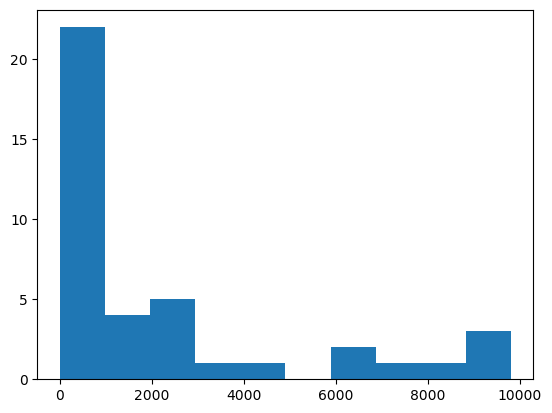

In [14]:
plt.pyplot.hist(X["C"])

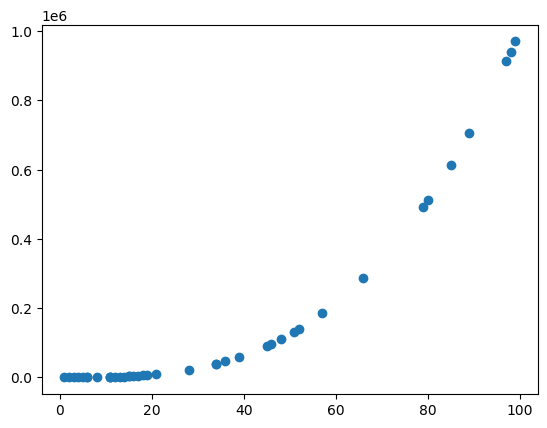

In [15]:
plt.pyplot.scatter(X["A"],X["B"])
#plt.pyplot.scatter(X["number"],X["exp"])

Text(0, 0.5, 'F')

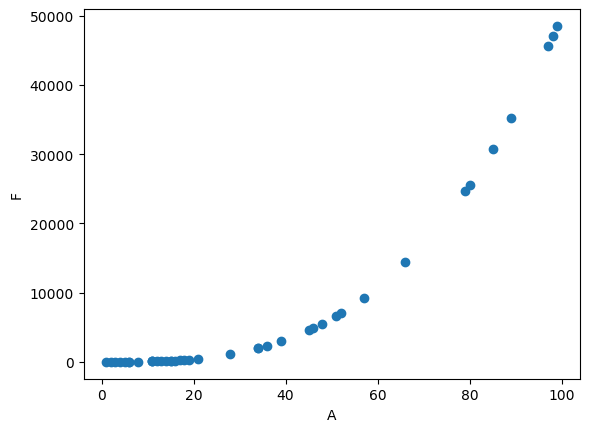

In [16]:
plt.pyplot.scatter(X["A"],X["F"])
plt.pyplot.xlabel('A')
plt.pyplot.ylabel('F')

As we can see that both the above graph have simmilar pattern.
This can be verified by correlation method.

In [17]:
X[['A','B','F']].corr()

,A,B,F
A,1.000000,0.914481,0.914481
B,0.914481,1.000000,1.000000
F,0.914481,1.000000,1.000000


Text(0, 0.5, 'D')

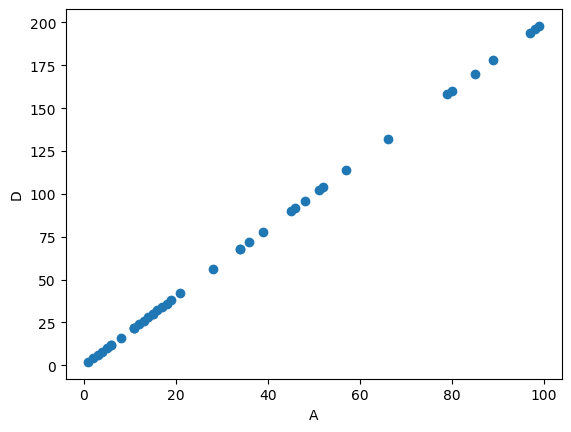

In [18]:
plt.pyplot.scatter(X["A"],X["D"])
plt.pyplot.xlabel('A')
plt.pyplot.ylabel('D')

In [19]:
X[['A','D']].corr()

,A,D
A,1.0,1.0
D,1.0,1.0


Text(0.5, 1.0, 'Line Plot')

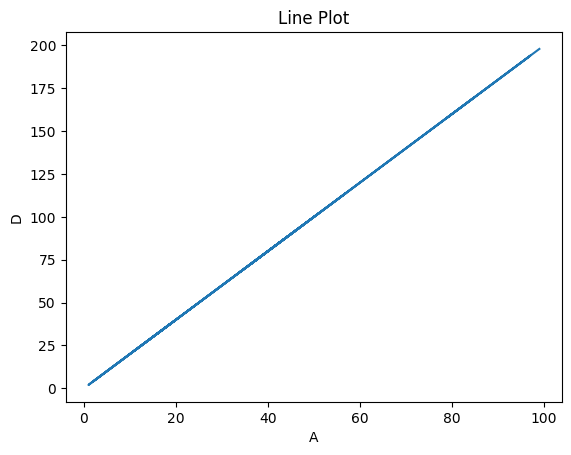

In [20]:
plt.pyplot.plot(X[('A')],X[('D')])
plt.pyplot.xlabel('A')
plt.pyplot.ylabel('D')
plt.pyplot.title('Line Plot')

In [21]:
import piplite
await piplite.install(['seaborn'])
import seaborn as sns

## <u>Regression plot

<AxesSubplot:xlabel='A', ylabel='B'>

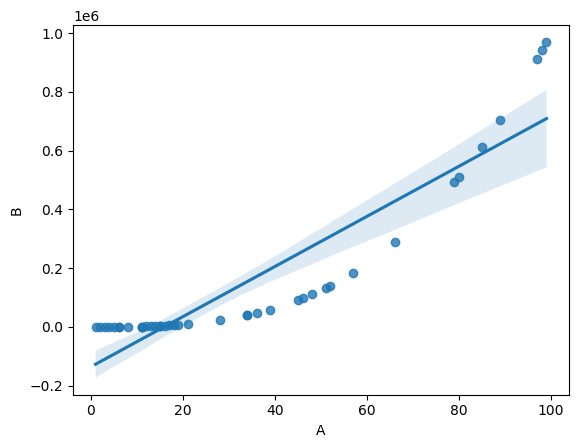

In [22]:
sns.regplot(x='A',y='B',data=X)

<AxesSubplot:xlabel='A', ylabel='D'>

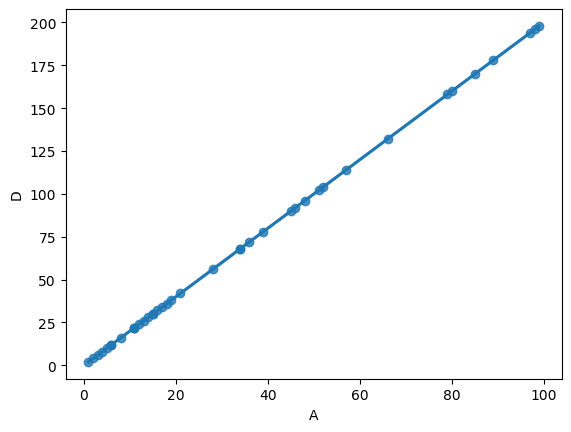

In [23]:
sns.regplot(x='A',y='D',data=X)

<AxesSubplot:xlabel='A', ylabel='E'>

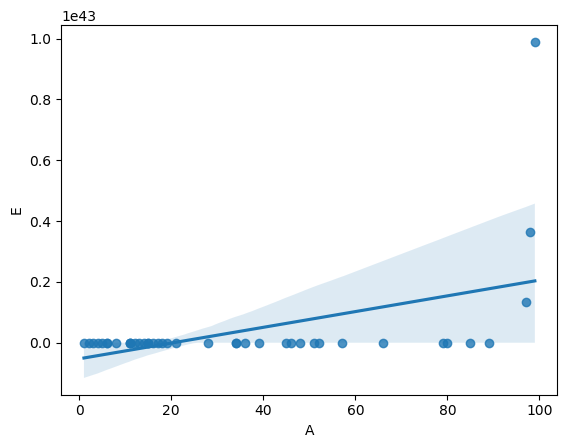

In [24]:
sns.regplot(x='A',y='E',data=X)

## <u>LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [26]:
x=X[['A']]
y=X[['B']]

In [27]:
X[['A','B']].corr()

,A,B
A,1.000000,0.914481
B,0.914481,1.000000


<AxesSubplot:xlabel='A', ylabel='B'>

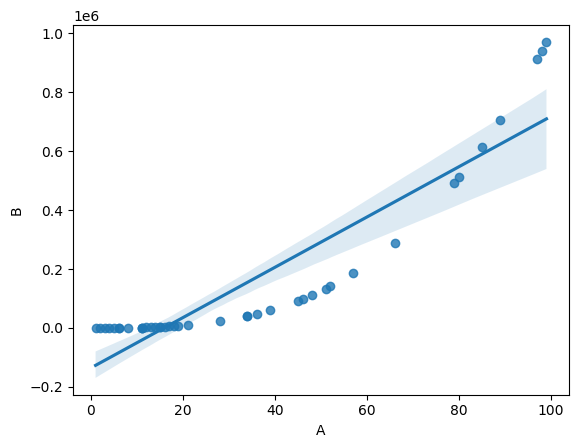

In [28]:
sns.regplot(x='A',y='B',data=X)

In [29]:
Z=lm.fit(x,y)
Z=lm.predict(x)
Z[0:5]

array([[ -92833.01618141],
       [ -84300.10631806],
       [-109898.83590812],
       [-118431.74577148],
       [-101365.92604477]])

## <u>Non-Linear regression model

In [30]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the non-linear function
def nonlinear_func(x,a):
    U=np.power(x,a)
    return U


[3.] [[0.]]

[1.25000e+02 2.16000e+02 2.70000e+01 8.00000e+00 6.40000e+01 5.83200e+03
 5.12000e+02 1.00000e+00 1.33100e+03 9.26100e+03 2.16000e+02 2.19700e+03
 6.85900e+03 3.37500e+03 1.33100e+03 1.72800e+03 2.74400e+03 1.40608e+05
 1.85193e+05 3.93040e+04 1.10592e+05 5.93190e+04 4.09600e+03 4.91300e+03
 7.04969e+05 9.12673e+05 4.93039e+05 5.12000e+05 6.14125e+05 1.33100e+03
 3.37500e+03 2.19520e+04 9.11250e+04 1.32651e+05 3.93040e+04 9.73360e+04
 4.66560e+04 2.87496e+05 9.41192e+05 9.70299e+05]


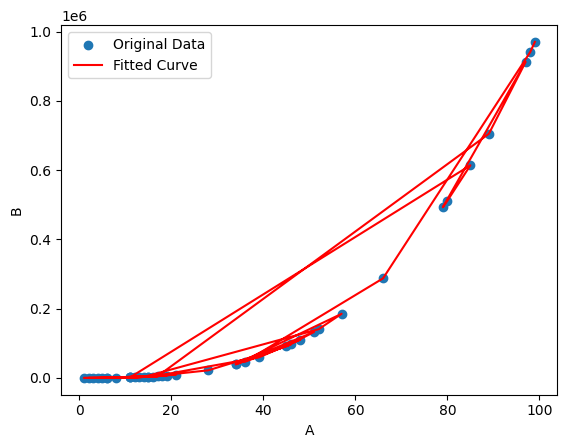

In [31]:
# Extract the independent variable and dependent variable columns from the DataFrame
x_data = X['A'].values
y_data = X['B'].values
a=[1]
# Perform the non-linear regression
popt, pcov = curve_fit(nonlinear_func, x_data,y_data)
print('')
print(popt, pcov)
# Generate y values for the fitted curve
print("")
y_fit = nonlinear_func(x_data, *popt)
print(y_fit)
# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fit, 'r', label='Fitted Curve')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.show()

In [32]:
Y_test= nonlinear_func(25, *popt)
Y_test

15625.0

### <u>CASE 2 : A and D

In [33]:
x=X[['A']]
y=X[['D']]

<AxesSubplot:xlabel='A', ylabel='D'>

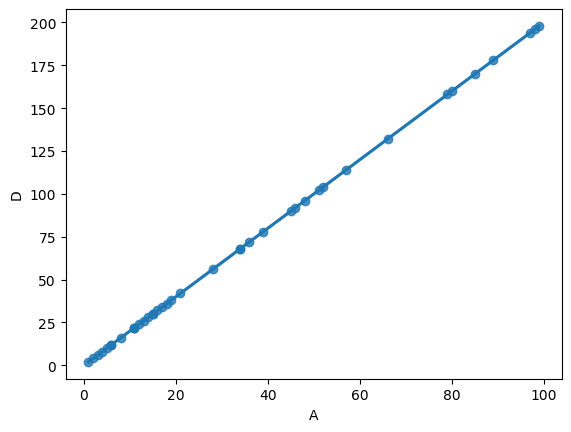

In [34]:
sns.regplot(x='A' , y='D' ,data=X)

In [35]:
Z=lm.fit(x,y)
Z=lm.predict(x)
Z[0:5]

array([[10.],
       [12.],
       [ 6.],
       [ 4.],
       [ 8.]])

In [36]:
print(y.head(),Z[0:5])

    D
0  10
1  12
2   6
3   4
4   8 [[10.]
 [12.]
 [ 6.]
 [ 4.]
 [ 8.]]


### <u>Multiple linear regression

In [37]:
x1=X[['C','B','F']]
y1=X[['D']]

In [38]:
lm.fit(x1,y1)
print(lm.intercept_,lm.coef_)
print(" ")
print(Q[0:5])
print(" ")
y1.head()

[16.05919508] [[ 4.91432779e-02 -3.15544276e-04 -1.57772138e-05]]
 
[[17.24823539]
 [17.76002513]
 [16.49294359]
 [16.25323753]
 [16.82524221]]
 


,D
0,10
1,12
2,6
3,4
4,8


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y1,Q)
r2

0.9893498371546111

### <u>Polynomial regression

In [40]:
x11=X['C']
y11=X['A']
f = np.polyfit(x11, y11, 2)
p = np.poly1d(f)
print(p)
print(f)
print('')
y_pred = p(x11)
r2 = r2_score(y11, y_pred)
print("R-squared:", r2)
print('')
print('predicting value')
y6=p(4)
print('predicted value',y6)


            2
-9.531e-07 x + 0.01806 x + 9.171
[-9.53056030e-07  1.80618252e-02  9.17095872e+00]

R-squared: 0.9833483504176526

predicting value
predicted value 9.243190768783833


<AxesSubplot:xlabel='C', ylabel='A'>

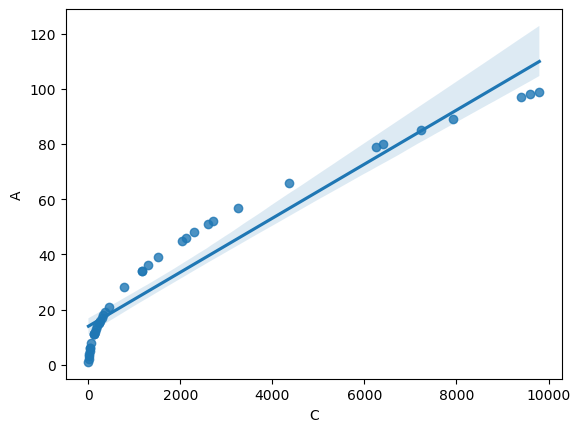

In [41]:
sns.regplot(x='C' , y='A' ,data=X)